In [1]:
import sys
print (sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
%matplotlib inline
import sys,os,shutil
sys.path.insert(0,'/Users/sammymetref/Documents/Boost-Swot/Notebooks/GitHub/Personal_Files/2018/Scripts/2018-03-15-sm-qgsw-DI-master-modified/') 
import numpy as np
import matplotlib.pylab as plt
import time
import netCDF4 as nc
import qgsw

In [3]:
# OSMOSIS: SSH from NATL60, daily outputs, degradated grid (3x3)
file_deg='/Users/sammymetref/Documents/Boost-Swot/Notebooks/GitHub/Personal_Files/2018/Data/OSMOSIS/NATL60OSMO-CJM165_y2012m06d14-y2013m10d01.1d_SSHdegrad.nc'
fid_deg = nc.Dataset(file_deg)
lon2d=np.array(fid_deg.variables["nav_lon"][:])
lat2d=np.array(fid_deg.variables["nav_lat"][:])
SSH_NATL60_degrad=np.array(fid_deg.variables["degraded_sossheig"][:,:])

In [4]:
# OSMOSIS: SSH from NATL60, daily outputs
file='/Users/sammymetref/Documents/Boost-Swot/Notebooks/GitHub/Personal_Files/2018/Data/OSMOSIS/NATL60OSMO-CJM165_y2012m06d14-y2013m10d01.1d_SST-SSH.nc'
fid = nc.Dataset(file)
lon2=np.array(fid.variables["nav_lon"][:])
lat2=np.array(fid.variables["nav_lat"][:])
SSH_NATL60=np.array(fid.variables["sossheig"][:,:])

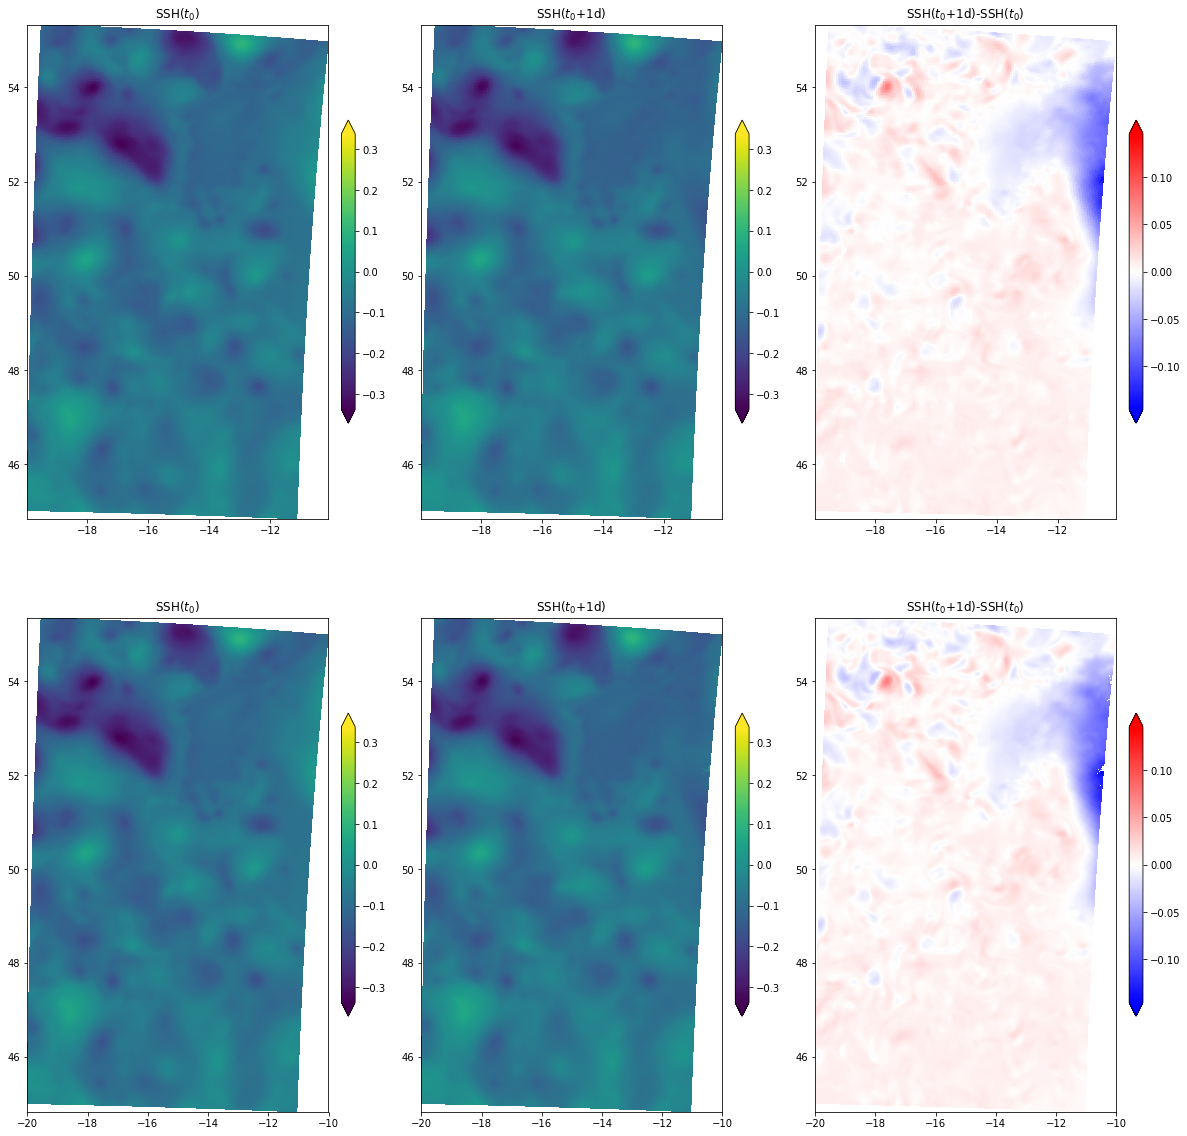

In [7]:
t=0
p=1 

plt.figure(figsize=(20, 20))

max_range=max(np.max(np.max(np.abs(SSH_NATL60_degrad[p,:,:]))),np.max(np.max(np.abs(SSH_NATL60_degrad[t,:,:]))))
plt.subplot(231) 
plt.pcolormesh(lon2d,lat2d,SSH_NATL60_degrad[t,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.clim(-max_range,max_range)
plt.title('SSH($t_0$)');

plt.subplot(232)
plt.pcolormesh(lon2d,lat2d,SSH_NATL60_degrad[p,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.clim(-max_range,max_range)
plt.title('SSH($t_0$+%sd)'%p);

max_range_degrad_diff=np.max(np.max(np.abs(SSH_NATL60[p,:,:]-SSH_NATL60[t,:,:])))
plt.subplot(233)
plt.pcolormesh(lon2d,lat2d,SSH_NATL60_degrad[p,:,:]-SSH_NATL60_degrad[t,:,:],cmap=plt.cm.get_cmap('bwr'))
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.clim(-max_range_degrad_diff,max_range_degrad_diff)
plt.title('SSH($t_0$+%sd)-SSH($t_0$)'%p);

plt.subplot(234)
plt.pcolormesh(lon2,lat2,SSH_NATL60[0,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.clim(-max_range,max_range)
plt.title('SSH($t_0$)');

plt.subplot(235)
plt.pcolormesh(lon2,lat2,SSH_NATL60[p,:,:],)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.clim(-max_range,max_range)
plt.title('SSH($t_0$+%sd)'%p);

max_range_diff=np.max(np.max(np.abs(SSH_NATL60[p,:,:]-SSH_NATL60[t,:,:])))
plt.subplot(236)
plt.pcolormesh(lon2,lat2,SSH_NATL60[p,:,:]-SSH_NATL60[t,:,:],cmap=plt.cm.get_cmap('bwr'))
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.clim(-max_range_diff,max_range_diff)
plt.title('SSH($t_0$+%sd)-SSH($t_0$)'%p);

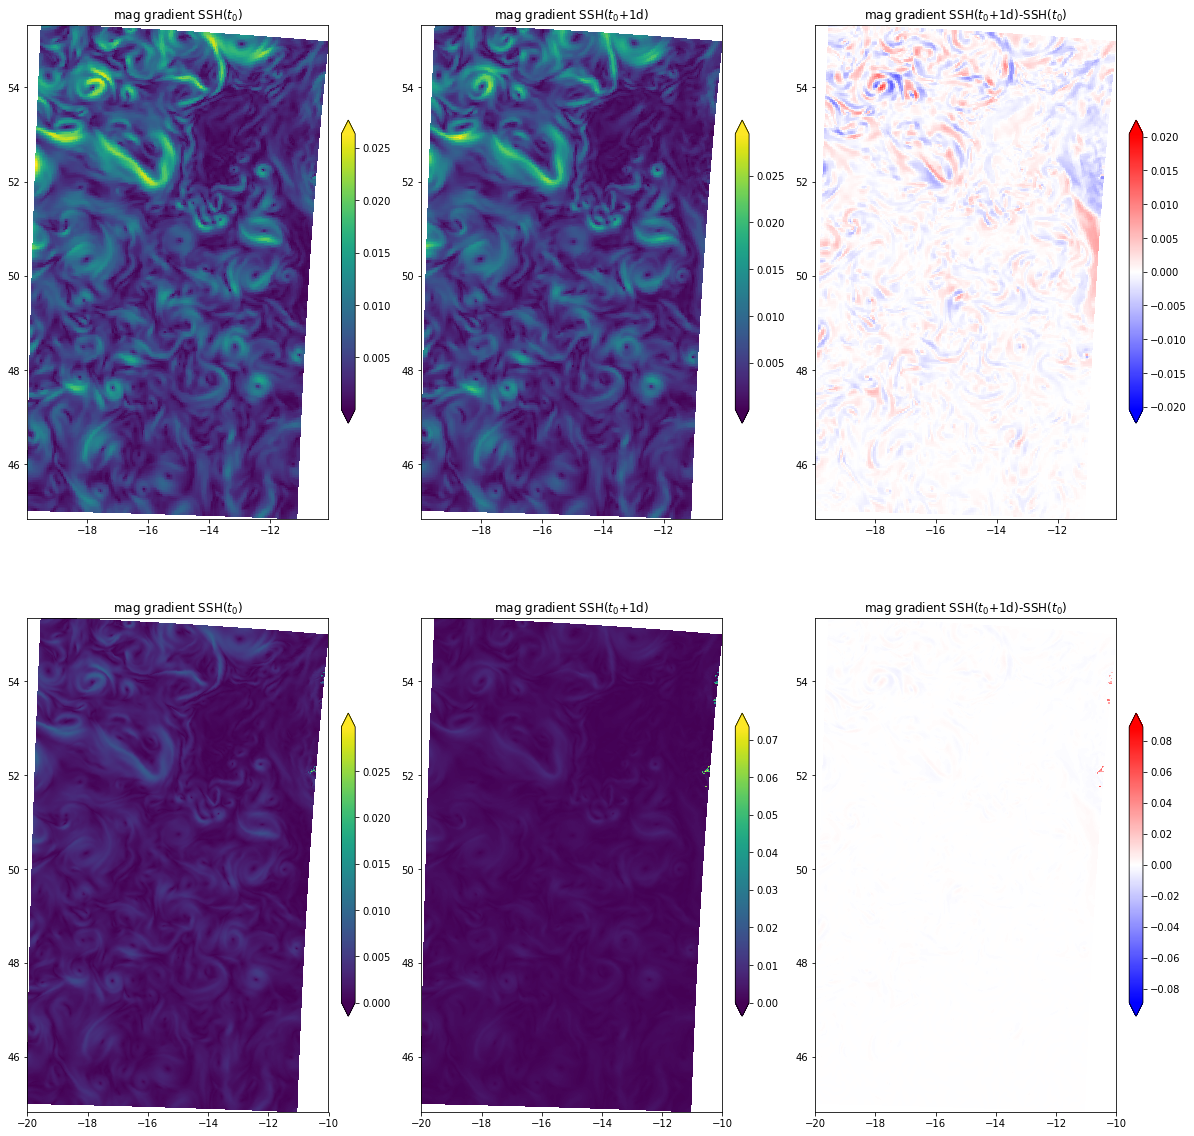

In [35]:
plt.figure(figsize=(20, 20))


plt.subplot(231)
gradI0 = np.gradient(SSH_NATL60_degrad[t,:,:])
mag0 = np.sqrt(gradI0[0]**2 + gradI0[1]**2)
plt.pcolormesh(lon2d,lat2d,mag0)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('mag gradient SSH($t_0$)');

plt.subplot(232)
gradI1 = np.gradient(SSH_NATL60_degrad[p,:,:])
mag1 = np.sqrt(gradI1[0]**2 + gradI1[1]**2)
plt.pcolormesh(lon2d,lat2d,mag1)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('mag gradient SSH($t_0$+%sd)'%p);

plt.subplot(233)
gradI0 = np.gradient(SSH_NATL60_degrad[p,:,:])
gradI02 = np.gradient(SSH_NATL60_degrad[t,:,:])
mag0 = np.sqrt(gradI0[0]**2 + gradI0[1]**2)
mag02 = np.sqrt(gradI02[0]**2 + gradI02[1]**2)
max_range=np.max(np.max(np.abs(mag0-mag02)))
plt.pcolormesh(lon2d,lat2d,mag0-mag02,cmap=plt.cm.get_cmap('bwr'))
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.clim(-max_range,max_range)
plt.title('mag gradient SSH($t_0$+%sd)-SSH($t_0$)'%p);

plt.subplot(234)
gradI0 = np.gradient(SSH_NATL60[t,:,:])
mag0 = np.sqrt(gradI0[0]**2 + gradI0[1]**2)
plt.pcolormesh(lon2,lat2,mag0)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('mag gradient SSH($t_0$)');

plt.subplot(235)
gradI1 = np.gradient(SSH_NATL60[p,:,:])
mag1 = np.sqrt(gradI1[0]**2 + gradI1[1]**2)
plt.pcolormesh(lon2,lat2,mag1)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('mag gradient SSH($t_0$+%sd)'%p);

plt.subplot(236)
gradI0 = np.gradient(SSH_NATL60[p,:,:])
gradI02 = np.gradient(SSH_NATL60[t,:,:])
mag0 = np.sqrt(gradI0[0]**2 + gradI0[1]**2)
mag02 = np.sqrt(gradI02[0]**2 + gradI02[1]**2)
max_range=np.max(np.max(np.abs(mag0-mag02)))
plt.pcolormesh(lon2,lat2,mag0-mag02,cmap=plt.cm.get_cmap('bwr'))
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.clim(-max_range,max_range)
plt.title('mag gradient SSH($t_0$+%sd)-SSH($t_0$)'%p);